In [1]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

2023-06-06 17:20:49.733035: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-06 17:20:50.114820: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-06 17:20:50.195608: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-06-06 17:20:50.195629: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

In [3]:
data_dir = '../raw_data'

In [2]:
ds = tf.keras.utils.image_dataset_from_directory(
  data_dir)

Found 55448 files belonging to 39 classes.


2023-06-06 17:08:13.871816: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-06-06 17:08:13.871887: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-06-06 17:08:13.871904: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (CyberA): /proc/driver/nvidia/version does not exist
2023-06-06 17:08:13.872188: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


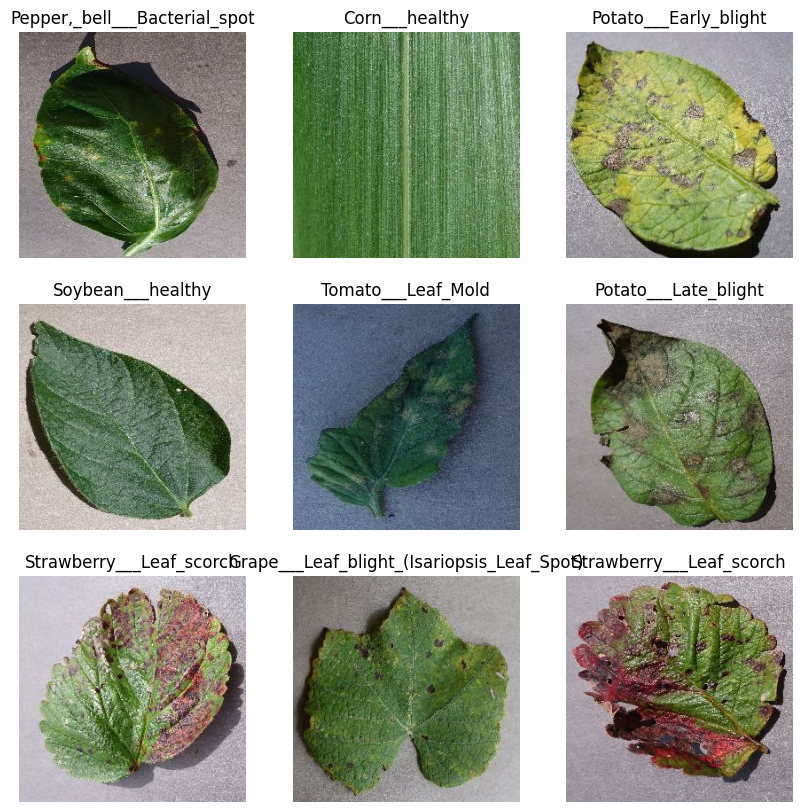

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, labels in ds.take(2):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(ds.class_names[labels[i]])
        plt.axis("off")

In [4]:
for image_batch, labels_batch in ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 256, 256, 3)
(32,)


In [5]:
classes = ds.class_names

In [6]:
classes = ds.class_names
numbers= np.arange(1,40,1)
dict_leaves = {classes[i]: numbers[i] for i in range(len(classes))}
dict_leaves

{'Apple___Apple_scab': 1,
 'Apple___Black_rot': 2,
 'Apple___Cedar_apple_rust': 3,
 'Apple___healthy': 4,
 'Background_without_leaves': 5,
 'Blueberry___healthy': 6,
 'Cherry___Powdery_mildew': 7,
 'Cherry___healthy': 8,
 'Corn___Cercospora_leaf_spot Gray_leaf_spot': 9,
 'Corn___Common_rust': 10,
 'Corn___Northern_Leaf_Blight': 11,
 'Corn___healthy': 12,
 'Grape___Black_rot': 13,
 'Grape___Esca_(Black_Measles)': 14,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 15,
 'Grape___healthy': 16,
 'Orange___Haunglongbing_(Citrus_greening)': 17,
 'Peach___Bacterial_spot': 18,
 'Peach___healthy': 19,
 'Pepper,_bell___Bacterial_spot': 20,
 'Pepper,_bell___healthy': 21,
 'Potato___Early_blight': 22,
 'Potato___Late_blight': 23,
 'Potato___healthy': 24,
 'Raspberry___healthy': 25,
 'Soybean___healthy': 26,
 'Squash___Powdery_mildew': 27,
 'Strawberry___Leaf_scorch': 28,
 'Strawberry___healthy': 29,
 'Tomato___Bacterial_spot': 30,
 'Tomato___Early_blight': 31,
 'Tomato___Late_blight': 32,
 'Tomato_

In [7]:
ds.element_spec

(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None,), dtype=tf.int32, name=None))

In [8]:
# y= ds.class_names
# X= 

In [9]:
sample = next(iter(ds))
sample

(<tf.Tensor: shape=(32, 256, 256, 3), dtype=float32, numpy=
 array([[[[158., 153., 150.],
          [149., 144., 141.],
          [138., 133., 130.],
          ...,
          [137., 131., 133.],
          [130., 124., 126.],
          [126., 120., 122.]],
 
         [[131., 126., 123.],
          [134., 129., 126.],
          [142., 137., 134.],
          ...,
          [126., 120., 122.],
          [136., 130., 132.],
          [123., 117., 119.]],
 
         [[127., 122., 119.],
          [128., 123., 120.],
          [132., 127., 124.],
          ...,
          [124., 118., 120.],
          [136., 130., 132.],
          [126., 120., 122.]],
 
         ...,
 
         [[177., 177., 179.],
          [178., 178., 180.],
          [180., 180., 182.],
          ...,
          [192., 190., 191.],
          [194., 192., 193.],
          [198., 196., 197.]],
 
         [[185., 185., 187.],
          [184., 184., 186.],
          [184., 184., 186.],
          ...,
          [199., 197., 198.

In [10]:
#tf.keras.layers.Rescaling(1./255)


In [11]:
# train_ds = tf.keras.utils.image_dataset_from_directory(
#     data_dir,
#     labels='inferred',
#     #label_mode=None,
#     #class_names="class_names",
#     color_mode='rgb',
#     batch_size=None,
#     image_size=(256, 256),
#     shuffle=True,
#     seed=123,
#     validation_split=0.2,
#     subset="training")  

In [12]:
len(ds.class_names)

39

In [13]:
# val_ds = tf.keras.utils.image_dataset_from_directory(
#     data_dir,
#     labels='inferred',
#     color_mode='rgb',
#     batch_size=None,
#     image_size=(256, 256),
#     shuffle=True,
#     seed=123,
#     validation_split=0.2,
#     subset="validation")

In [14]:
# train_ds

In [15]:
# ds.as_numpy_iterator().next()

In [ ]:

# Create the dataset from directory
train_val_dataset, test_dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    image_size=(256, 256),
    batch_size=32,
    validation_split=0.2,
    subset="both",
    shuffle=False
#     seed=42
)

# Split the dataset into training, test, and validation sets
# temp = ds
# test_dataset = tf.keras.utils.image_dataset_from_directory(
#     data_dir,
#     image_size=(256, 256),
#     batch_size=32,
#     validation_split=0.2,
#     subset="validation",
#     seed=42
# )

train_dataset, val_dataset = tf.keras.utils.split_dataset(
    train_val_dataset, left_size=0.8, right_size=0.2, shuffle=True
)




Found 55448 files belonging to 39 classes.
Using 44359 files for training.
Using 11089 files for validation.


2023-06-06 17:22:02.142591: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-06-06 17:22:02.143369: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-06-06 17:22:02.143390: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (CyberA): /proc/driver/nvidia/version does not exist
2023-06-06 17:22:02.148431: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
# train_to_numpy = list(train_dataset.as_numpy_iterator())
# shape = tf.shape(dataset_to_numpy)
# print(shape)

In [ ]:
from tensorflow.keras import models, losses
from tensorflow.keras import Sequential, layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Rescaling, RandomFlip, RandomRotation

model = models.Sequential()

model.add(layers.Rescaling(1./255))
model.add(layers.RandomFlip("horizontal_and_vertical"))
model.add(layers.RandomRotation(0.2))
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(layers.MaxPool2D(pool_size=(2,2))) 
model.add(layers.Conv2D(32, kernel_size=(3), activation='relu')) # kernel_size = 3 <==> (3, 3)
model.add(layers.MaxPool2D(pool_size=(2,2))) 
model.add(layers.Flatten())
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(39, activation='softmax')) 

#model.summary() 

In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              optimizer='adam',
              metrics=['accuracy'])

model.fit(train_dataset,
          validation_data=val_dataset,
          epochs=2,  # Use early stopping in practice
          batch_size=32, 
          verbose=1)

In [ ]:
model.summary()